<a href="https://colab.research.google.com/github/OutBreak778/deep-learning-topics/blob/master/transfer_learning_googleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers #type: ignore
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.applications import ResNet50  # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore
from tensorflow.keras.applications.resnet50 import decode_predictions # type: ignore


In [5]:
IMAGE_SHAPE = (224, 224, 3)

classifier = ResNet50(weights="imagenet", input_shape=IMAGE_SHAPE)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


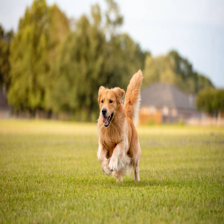

In [21]:
img_path = "/golden_retriever.jpg"  # Change to your image path
img = Image.open("/golden_retriever.jpg" ).resize(IMAGE_SHAPE[:2])
img

In [27]:
img1 = np.array(img) / 255.0
img1.shape

(224, 224, 3)

In [28]:
img1[np.newaxis, ...].shape


(1, 224, 224, 3)

In [29]:
result = classifier.predict(img1[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


(1, 1000)

In [30]:
predictLabel = np.argmax(result)
predictLabel

np.int64(111)

In [39]:
img_path = "/golden_retriever.jpg"  # Change to your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize for ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Normalize

# Predict using the model
predictions = classifier.predict(img_array)

# # Decode top 3 predictions
# decoded_predictions = decode_predictions(predictions, top=1000)[0]
# for i, (imagenet_id, label, score) in enumerate(decoded_predictions):

#     print(f"{label} ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


In [41]:
label = []
with open("/labeldata.txt",'r') as f:
  label = f.read().splitlines()
label[:10]

['golden_retriever ',
 'Irish_terrier ',
 'collie ',
 'basenji ',
 'sorrel ',
 'German_shepherd ',
 'Airedale ',
 'Pembroke ',
 'chow ',
 'muzzle ']

In [42]:
label[predictLabel]

'Italian_greyhound '

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [51]:
num_of_flowers = 5

model = Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7ebb15783f90> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)